Fashion MNIST experiment

## Loading the packages

In [5]:
%pip install tensorflow --upgrade
%pip install keras --upgrade

import numpy as np
from matplotlib import pyplot as pl

from keras.datasets import fashion_mnist
from keras.models import Model
from keras.layers.core import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import RMSprop
from keras.utils import np_utils
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Input
from sklearn import metrics as me
from scipy import stats

%matplotlib inline

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [6]:
def build_grid_of_images(array):
    assert len(array.shape) == 3
    dim_0 = np.sqrt(array.shape[0])
    assert dim_0.is_integer()
    
    temp_out = np.reshape(array, (dim_0, dim_0, array.shape[1], array.shape[2]))
    temp_out = np.rollaxis(temp_out, 1, 3)
    return np.reshape(temp_out, (dim_0*array.shape[1], dim_0*array.shape[2]))

def plot_conv_layer_output(temp_out, title):
    temp_to_plot = build_grid_of_images(temp_out)
    pl.imshow(temp_to_plot, interpolation='nearest', cmap=pl.get_cmap('Greys'))
    ax = pl.gca()
    ax.set_xticks(np.arange(-0.5, temp_to_plot.shape[0]+0.5, temp_out.shape[1]))    
    ax.set_yticks(np.arange(-0.5, temp_to_plot.shape[0]+0.5, temp_out.shape[2]))
    pl.grid()
    pl.tick_params(axis='both', which='both', bottom='off', top='off', left='off', right='off', labelbottom='off', labelleft='off')
    pl.title(title)

def plot_dense_layer_output(temp_out, title):
    pl.bar(np.arange(temp_out.shape[1])-0.4, temp_out[0,:])
    pl.xlim(-0.5, temp_out.shape[1])
    pl.grid()
    pl.title(title)

In [7]:
#load the mnist dataset and normalize in the range[0,1]
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

n_train, height, width = X_train.shape
n_test, _, _ = X_test.shape

X_train = X_train.reshape(n_train, height, width, 1).astype('float32')
X_test = X_test.reshape(n_test, height, width, 1).astype('float32')

X_train /= 255.0
X_test /= 255.0

n_classes = 10

print(n_train, 'train samples')
print(n_test, 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)

4431872/4422102 [==============================] - 0s 0us/step
60000 train samples
10000 test samples


In [8]:
#creat the CNN and show its architecture
l0 = Input(shape=(height, width, 1), name='l0')

l1 = Conv2D(9, (5, 5), padding='same', activation='relu', name='l1')(l0)
l1_mp = MaxPooling2D(pool_size=(2, 2), name='l1_mp')(l1)

l2 = Conv2D(9, (5, 5), padding='same', activation='relu', name='l2')(l1_mp)
l2_mp = MaxPooling2D(pool_size=(2, 2), name='l2_mp')(l2)

l3 = Conv2D(16, (3, 3), padding='same', activation='relu', name='l3')(l2_mp)
l3_mp = MaxPooling2D(pool_size=(2, 2), name='l3_mp')(l3)

flat = Flatten(name='flat')(l3_mp)

l4 = Dense(25, activation='relu', name='l4')(flat)

l5 = Dense(n_classes, activation='softmax', name='l5')(l4)

model = Model(inputs=l0, outputs=l5)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 l0 (InputLayer)             [(None, 28, 28, 1)]       0         
                                                                 
 l1 (Conv2D)                 (None, 28, 28, 9)         234       
                                                                 
 l1_mp (MaxPooling2D)        (None, 14, 14, 9)         0         
                                                                 
 l2 (Conv2D)                 (None, 14, 14, 9)         2034      
                                                                 
 l2_mp (MaxPooling2D)        (None, 7, 7, 9)           0         
                                                                 
 l3 (Conv2D)                 (None, 7, 7, 16)          1312      
                                                                 
 l3_mp (MaxPooling2D)        (None, 3, 3, 16)          0     

In [9]:
#define some constatns and train the CNN
batch_size = 128
n_epoch = 10

model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=n_epoch, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/10
469/469 [==============================] - 20s 41ms/step - loss: 0.8862 - accuracy: 0.6813 - val_loss: 0.6440 - val_accuracy: 0.7706
Epoch 2/10
469/469 [==============================] - 19s 41ms/step - loss: 0.5464 - accuracy: 0.8023 - val_loss: 0.4932 - val_accuracy: 0.8250
Epoch 3/10
469/469 [==============================] - 22s 46ms/step - loss: 0.4564 - accuracy: 0.8356 - val_loss: 0.4423 - val_accuracy: 0.8403
Epoch 4/10
469/469 [==============================] - 30s 63ms/step - loss: 0.4079 - accuracy: 0.8533 - val_loss: 0.4269 - val_accuracy: 0.8484
Epoch 5/10
469/469 [==============================] - 31s 66ms/step - loss: 0.3779 - accuracy: 0.8640 - val_loss: 0.4129 - val_accuracy: 0.8544
Epoch 6/10
469/469 [==============================] - 30s 64ms/step - loss: 0.3575 - accuracy: 0.8715 - val_loss: 0.3783 - val_accuracy: 0.8660
Epoch 7/10
469/469 [==============================] - 31s 65ms/step - loss: 0.3408 - accuracy: 0.8772 - val_loss: 0.3757 - val_accuracy:

Test score: 0.33464717864990234
Test accuracy: 0.8797000050544739


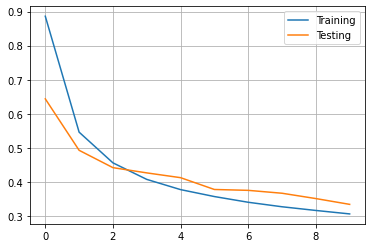

In [10]:
#show the performance
pl.plot(history.history['loss'], label='Training')
pl.plot(history.history['val_loss'], label='Testing')
pl.legend()
pl.grid()

score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

In [11]:
#confusion matrix
pred = model.predict_on_batch(X_test)
pred = np.argmax(pred, axis=-1)
me.confusion_matrix(y_test, pred)

array([[803,   1,  16,  53,   5,   3, 111,   0,   8,   0],
       [  2, 965,   0,  24,   5,   0,   2,   0,   2,   0],
       [ 14,   2, 825,  11,  90,   0,  58,   0,   0,   0],
       [ 11,   5,   9, 918,  21,   0,  34,   0,   2,   0],
       [  2,   2,  76,  51, 804,   0,  63,   0,   2,   0],
       [  0,   0,   0,   2,   0, 971,   0,  12,   5,  10],
       [117,   1,  88,  44,  77,   0, 659,   0,  14,   0],
       [  0,   0,   0,   0,   0,  27,   0, 912,   1,  60],
       [  4,   0,   9,   8,   3,   1,   4,   3, 966,   2],
       [  0,   0,   0,   0,   0,   8,   1,  17,   0, 974]], dtype=int64)